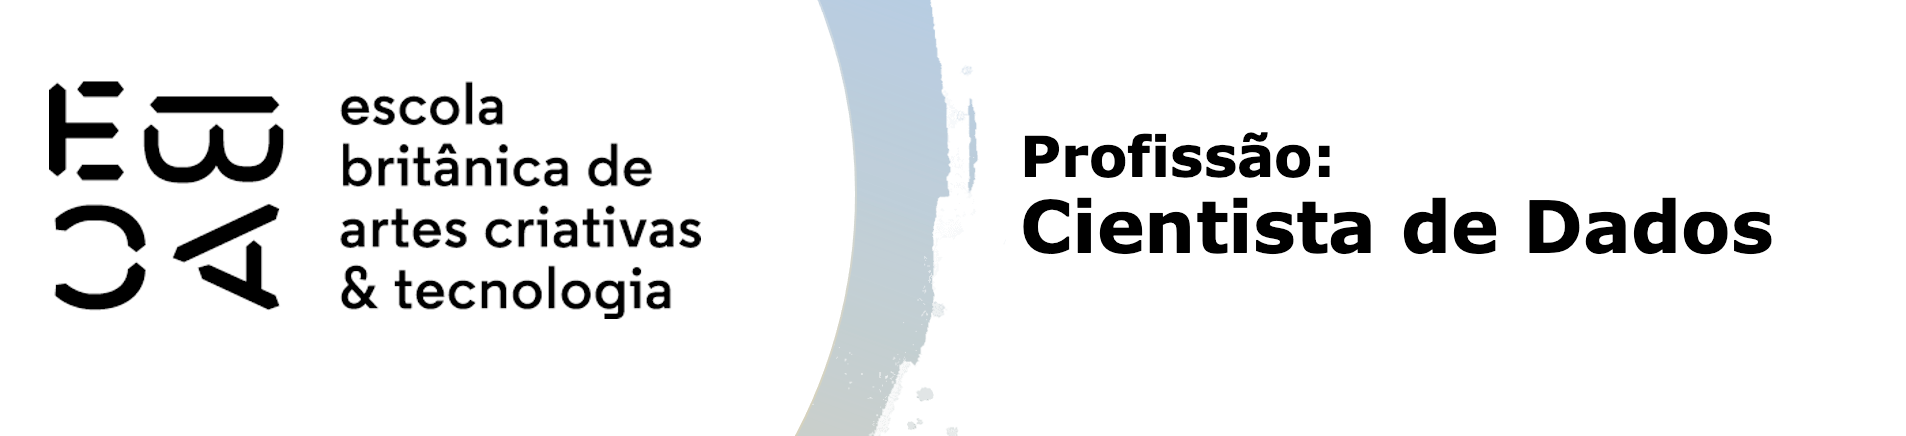

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [34]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as ss

df = pd.read_csv('Dados/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [2]:
# Tirar colunas 'data_ref' e 'index'
df = df.drop(columns=['data_ref', 'index'], errors='ignore')

# Remover linhas com valores ausentes (NaN)
df = df.dropna()

# Visualizar as primeiras linhas
df.head()


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
# Quantidade de linhas e colunas
linhas, colunas = df.shape

print(f"Quantidade de linhas: {linhas}")
print(f"Quantidade de colunas: {colunas}")

Quantidade de linhas: 624240
Quantidade de colunas: 12


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

In [4]:
# 1. Ajuste do modelo

reg = smf.ols('np.log(renda) ~ idade + tempo_emprego', data=df).fit()
print(reg.summary())




                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 2.286e+05
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:34:27   Log-Likelihood:            -8.9158e+05
No. Observations:              624240   AIC:                         1.783e+06
Df Residuals:                  624237   BIC:                         1.783e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.9682      0.006   1398.357

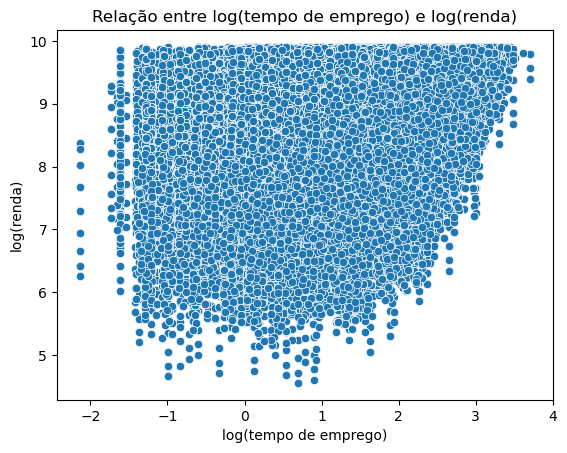

In [5]:
# Evita divisão por zero e log de valores negativos

df = df[df['renda'] > 0]
df = df[df['tempo_emprego'] > 0]


# Transformações logarítmicas

df['log_renda'] = np.log(df['renda'])
df['log_tempo_emprego'] = np.log(df['tempo_emprego'])

# Exemplo de filtro opcional para tirar outliers de renda

df_filtrado = df[df['renda'] < 20000]

# Gráfico de dispersão log-log
sns.scatterplot(x='log_tempo_emprego', y='log_renda', data=df_filtrado)
plt.title('Relação entre log(tempo de emprego) e log(renda)')
plt.xlabel('log(tempo de emprego)')
plt.ylabel('log(renda)')
plt.show()



In [6]:
# 1. Ajuste do modelo

reg = smf.ols('np.log(renda) ~ idade + tempo_emprego', data=df_filtrado).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                 3.420e+04
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:35:15   Log-Likelihood:            -5.7132e+05
No. Observations:              466939   AIC:                         1.143e+06
Df Residuals:                  466936   BIC:                         1.143e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.0263      0.005   1503.001

In [7]:
# Transformações logarítmicas em variáveis numéricas (exemplo com idade e renda)
df['log_idade'] = np.log(df['idade'])
df['log_renda'] = np.log(df['renda'])


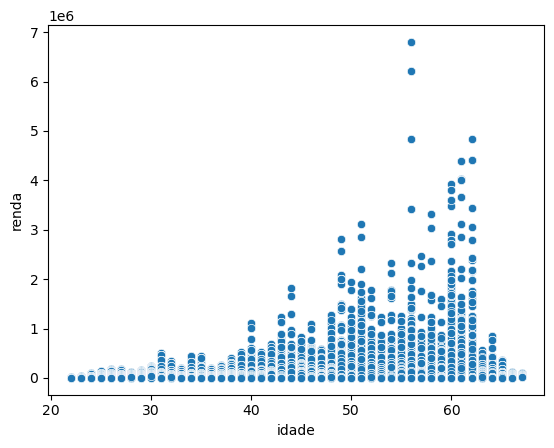

In [7]:
# Gráfico de dispersão (como o scatterplot de tip vs total_bill)
sns.scatterplot(y='renda', x='idade', data=df)
plt.show()

In [8]:
# Regressão linear simples (exemplo com renda vs idade)
reg = smf.ols('np.log(renda) ~ idade', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                 3.666e+04
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:35:36   Log-Likelihood:            -1.0453e+06
No. Observations:              624240   AIC:                         2.091e+06
Df Residuals:                  624238   BIC:                         2.091e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7357      0.007   1063.514      0.0

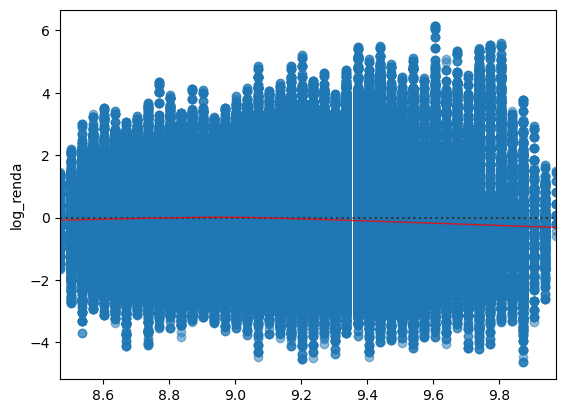

In [9]:
# Gráfico de resíduos ajustados
sns.residplot(x=reg.predict(), y=df['log_renda'], lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

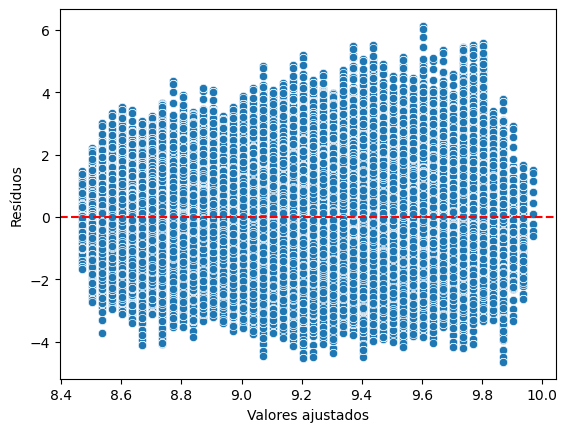

In [12]:
# resíduos simples

sns.scatterplot(x=reg.fittedvalues, y=reg.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.show()


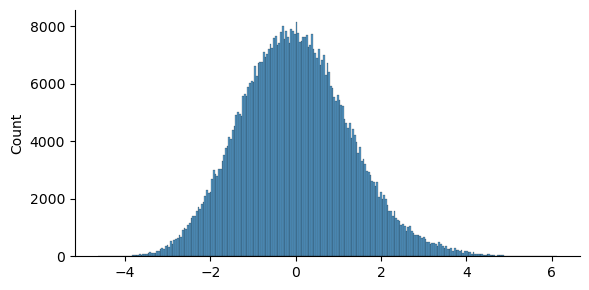

In [13]:
# Histograma dos resíduos

sns.displot(reg.resid, height=3, aspect=2)
plt.show()

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

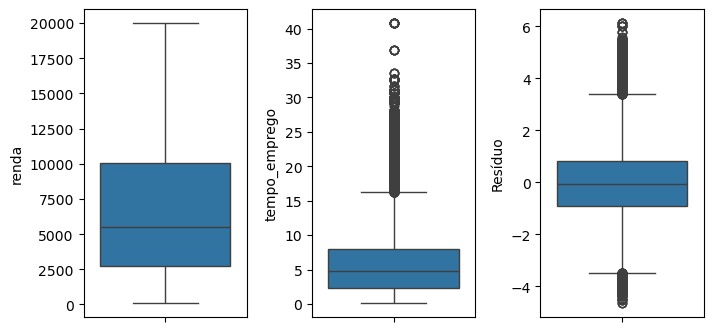

In [14]:
fix, ax = plt.subplots(1, 3, figsize=(8,4))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y = 'renda',data=df_filtrado, ax=ax[0])
sns.boxplot(y = 'tempo_emprego',data=df_filtrado, ax=ax[1])
sns.boxplot(y = reg.resid ,data=df_filtrado, ax=ax[2]);

ax[0].set_ylabel('renda')
ax[2].set_ylabel('tempo_emprego')
ax[2].set_ylabel('Resíduo');


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x = 'tempo_emprego', y = 'log_renda', data=df_filtrado, ax=ax)

for i, txt in enumerate(df.index.values):
    ax.annotate(str(txt), (df.loc[i,'tempo_emprego'], df.loc[i,'renda']))

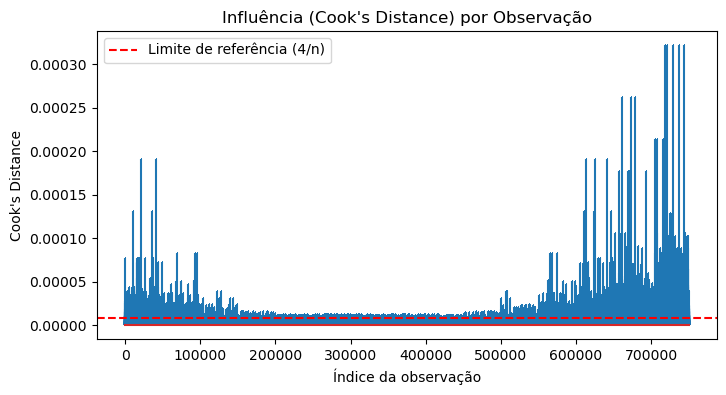

In [23]:
# base grande - alternativa

# Ajuste do modelo
reg = smf.ols('log_renda ~ tempo_emprego', data=df_filtrado).fit()

# Calculando medidas de influência
influence = OLSInfluence(reg)

# Obter os valores de Cook's Distance
cooks_d = influence.cooks_distance[0]

# Plotar um gráfico simples: Cook's Distance vs Observação
plt.figure(figsize=(8,4))
plt.stem(cooks_d.index, cooks_d, markerfmt=",")  # Sem o use_line_collection
plt.axhline(4 / len(df_filtrado), color='red', linestyle='--', label='Limite de referência (4/n)')
plt.xlabel('Índice da observação')
plt.ylabel("Cook's Distance")
plt.title("Influência (Cook's Distance) por Observação")
plt.legend()
plt.show()


In [25]:

df_novo = df_filtrado[['tempo_emprego', 'renda']]
df_novo.head()


,tempo_emprego,renda
0,16.717808,11138.14
1,9.600000,2424.81
2,8.208219,13749.66
3,1.301370,2361.84
4,1.254795,790.78


In [26]:
# só funciona para variáveis contínuas

df_novo.corr()

,tempo_emprego,renda
tempo_emprego,1.000000,0.350592
renda,0.350592,1.000000


In [27]:
# aplica correlação do Rank
# mais robusta a outliers

df_novo.corr(method='spearman')

,tempo_emprego,renda
tempo_emprego,1.000000,0.350668
renda,0.350668,1.000000


In [29]:
def cramers_corrected_stat(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
        return result

In [30]:
def cram(x, y, max_cat=5):
    if (np.dtype(x) in {np.dtype('float64'), np.dtype('int64')}) \
        and (len(np.unique(x)) > max_cat):
            x_ = pd.qcut(x, max_cat)
#             print('#########')
    else: x_ = x
    if (np.dtype(y) in {np.dtype('float64'), np.dtype('int64')}) \
        and (len(np.unique(y)) > max_cat):
            y_ = pd.qcut(y, max_cat)
    else: y_ = y
    return cramers_corrected_stat(x_ ,y_)

In [32]:
df_completo = df_filtrado [['tempo_emprego', 'idade', 'renda']]

In [35]:
# comparar variáveis

x = df_completo.renda
y = df_completo.tempo_emprego

cram(x, y, 5)

0.1702260584948373

In [37]:
r1 = smf.ols('''
    renda ~ 
        tempo_emprego + idade
       ''', data=df_completo.dropna()).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                 3.281e+04
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:01:11   Log-Likelihood:            -4.6119e+06
No. Observations:              466939   AIC:                         9.224e+06
Df Residuals:                  466936   BIC:                         9.224e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4169.9965     30.592    136.310      0.000    4110.037    4229.956
tempo_emprego   411.5170      1.644    250.257      0.000     408.294     414.740
idade             9.3728      0.755     12.413      0.000       7.893      10.853
==============================================================================
Omnibus:                    42129.012   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54806.282
Skew:                           0.839   Prob(JB):                         0.00
Kurtosis:                       2.952   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
df.groupby('educacao')[['tempo_emprego','idade','renda']].mean()

,tempo_emprego,idade,renda
educacao,,,
Fundamental,5.997460,48.471822,15129.438655
Médio,7.985160,45.247485,24128.464358
Pós graduação,4.607610,41.365793,17102.042247
Superior completo,7.582009,42.126476,24230.885298
Superior incompleto,6.435215,35.413152,22172.971960


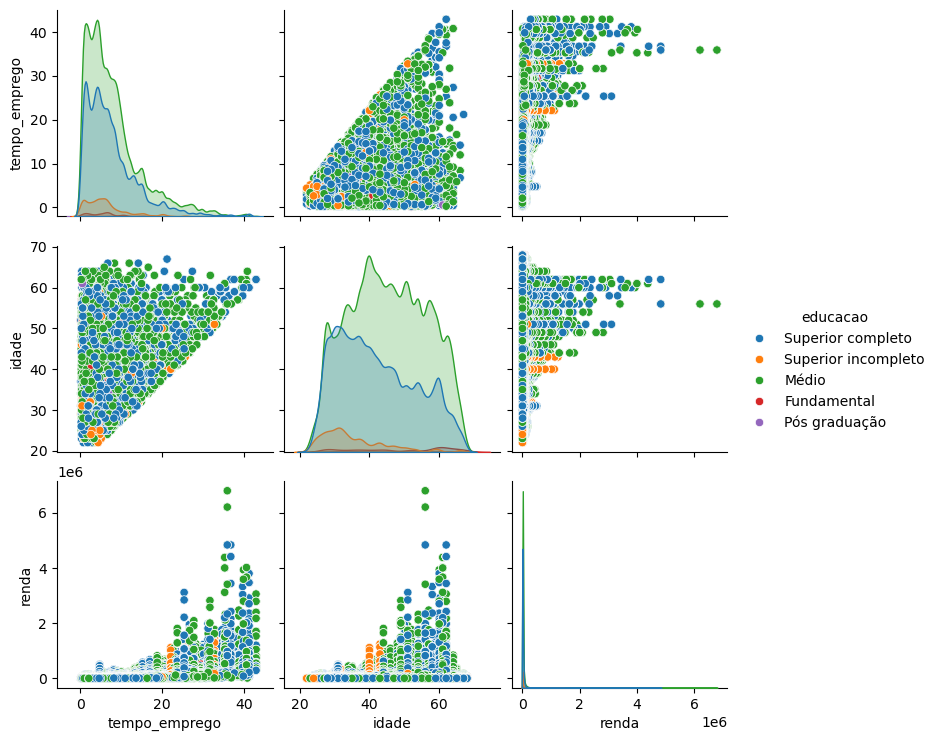

In [42]:
sns.pairplot(df[['tempo_emprego','idade','renda', 'educacao']]
             , hue='educacao');